# "Stable baselines 3 - 1st steps"
> "installation, 1st experimentations"
- show_tags: true
- toc: true
- branch: master
- badges: false
- comments: true
- categories: [reinforcement learning, pytorch, sb3]

# What is stable baselines 3 (sb3)

I have just read about this new release. This is a complete rewrite of stable baselines 2, without any reference to tensorflow, and based on pytorch (>1.4+).

There is a lot of running implementations of RL algorithms, based on gym.
A very good introduction in this [blog entry](https://araffin.github.io/post/sb3/)

[Stable-Baselines3: Reliable Reinforcement Learning Implementations | Antonin Raffin | Homepage](https://araffin.github.io/post/sb3/)

**Links**

- GitHub repository: [https://github.com/DLR-RM/stable-baselines3](https://github.com/DLR-RM/stable-baselines3)

- Documentation: [https://stable-baselines3.readthedocs.io/](https://stable-baselines3.readthedocs.io/)

- RL Baselines3 Zoo: [https://github.com/DLR-RM/rl-baselines3-zoo](https://github.com/DLR-RM/rl-baselines3-zoo)

- Contrib: [https://github.com/Stable-Baselines-Team/stable-baselines3-contrib](https://github.com/Stable-Baselines-Team/stable-baselines3-contrib)

- RL Tutorial: [https://github.com/araffin/rl-tutorial-jnrr19](https://github.com/araffin/rl-tutorial-jnrr19)



# My installation

Standard installation
```bash
conda create --name stablebaselines3 python=3.7
conda activate stablebaselines3
pip install stable-baselines3[extra]
conda install -c conda-forge jupyter_contrib_nbextensions
conda install nb_conda
```

In [5]:
!conda list

# packages in environment at /home/explore/miniconda3/envs/stablebaselines3:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                        main  
_pytorch_select           0.1                       cpu_0  
absl-py                   0.12.0                   pypi_0    pypi
atari-py                  0.2.6                    pypi_0    pypi
attrs                     20.3.0             pyhd3deb0d_0    conda-forge
backcall                  0.2.0              pyh9f0ad1d_0    conda-forge
backports                 1.0                        py_2    conda-forge
backports.functools_lru_cache 1.6.1                      py_0    conda-forge
blas                      1.0                         mkl  
bleach                    3.3.0              pyh44b312d_0    conda-forge
box2d                     2.3.10                   pypi_0    pypi
box2d-py                  2.3.8                    pypi_0    pypi
ca-certificates           2021.1.19      

# SB3 tutorials

In [ ]:
import gym

from stable_baselines3 import A2C
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import CheckpointCallback, EvalCallback

# Save a checkpoint every 1000 steps
checkpoint_callback = CheckpointCallback(save_freq=5000, save_path="/home/explore/git/guillaume/stable_baselines_3/logs/",
                                         name_prefix="rl_model")

# Evaluate the model periodically
# and auto-save the best model and evaluations
# Use a monitor wrapper to properly report episode stats
eval_env = Monitor(gym.make("LunarLander-v2"))
# Use deterministic actions for evaluation
eval_callback = EvalCallback(eval_env, best_model_save_path="/home/explore/git/guillaume/stable_baselines_3/logs/",
                             log_path="/home/explore/git/guillaume/stable_baselines_3/logs/", eval_freq=2000,
                             deterministic=True, render=False)

# Train an agent using A2C on LunarLander-v2
model = A2C("MlpPolicy", "LunarLander-v2", verbose=1)
model.learn(total_timesteps=20000, callback=[checkpoint_callback, eval_callback])

# Retrieve and reset the environment
env = model.get_env()
obs = env.reset()

# Query the agent (stochastic action here)
action, _ = model.predict(obs, deterministic=False)

# Issues and fix

**CUDA error: CUBLAS_STATUS_INTERNAL_ERROR**

Downgrade pytorch to 1.7.1 

to avoid `RuntimeError: CUDA error: CUBLAS_STATUS_INTERNAL_ERROR when calling cublasCreate(handle)`

```bash
pip install torch==1.7.1
```

**RuntimeError: CUDA error: invalid device function**

In [1]:
!nvidia-smi

Thu Mar 25 09:13:49 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.102.04   Driver Version: 450.102.04   CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro RTX 4000     Off  | 00000000:01:00.0  On |                  N/A |
| N/A   41C    P5    18W /  N/A |   2104MiB /  7982MiB |     32%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

CUDA version is 11.0 on my workstation.

In [2]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [4]:
!conda install pytorch==1.7.1 torchvision==0.8.2 torchaudio==0.7.2 cudatoolkit=11.0 -c pytorch

Solving environment: done

# All requested packages already installed.



Everything seems fine after these updates.

# Stable baselines 3 user guide

There is an impressive documentation associated with stable baselines 3.
[Quickstart](https://stable-baselines3.readthedocs.io/en/master/guide/quickstart.html)

## Tips and tricks

This [page](https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html) covers general advice about RL (where to start, which algorithm to choose, how to evaluate an algorithm, …), as well as tips and tricks when using a custom environment or implementing an RL algorithm.

* Be familiar with RL, see [resource](https://stable-baselines3.readthedocs.io/en/master/guide/rl.html) page
* read SB3 documentation
* do the [tutorial](https://github.com/araffin/rl-tutorial-jnrr19/tree/sb3)

**Tune hyperparameters**
RL zoo is introduced. It contains some hyperparameter optimization.

**RL evaluation**
We suggest you reading [Deep Reinforcement Learning that Matters](https://arxiv.org/abs/1709.06560) for a good discussion about RL evaluation.

**which algorithm to choose**
1st criteria is discrete vs continuous actions. And 2nd is capacity to parallelize training.


*Discrete Actions*
 
* Discrete Actions - Single Process

`DQN` with extensions (double DQN, prioritized replay, …) are the recommended algorithms. We notably provide `QR-DQN` in our [contrib repo](https://stable-baselines3.readthedocs.io/en/master/guide/sb3_contrib.html#sb3-contrib). `DQN` is usually slower to train (regarding wall clock time) but is the most sample efficient (because of its replay buffer).

* Discrete Actions - Multiprocessed
 
You should give a try to `PPO` or `A2C`.
 
*Continuous Actions*
 
* Continuous Actions - Single Process
 
Current State Of The Art (SOTA) algorithms are `SAC`, `TD3` and `TQC` (available in our [contrib repo](https://stable-baselines3.readthedocs.io/en/master/guide/sb3_contrib.html#sb3-contrib)). Please use the hyperparameters in the [RL zoo](https://github.com/DLR-RM/rl-baselines3-zoo) for best results.
 
* Continuous Actions - Multiprocessed
 
Take a look at `PPO` or `A2C`. Again, don’t forget to take the hyperparameters from the [RL zoo](https://github.com/DLR-RM/rl-baselines3-zoo) for continuous actions problems (cf _Bullet_ envs).


**Creating a custom env**

multiple times there are advices about normalizing: observation and action space. A good practice is to rescale your actions to lie in [-1, 1]. This does not limit you as you can easily rescale the action inside the environment

**tips and tricks to reproduce a RL paper**

[Reinforcement Learning Tips and Tricks — Stable Baselines3 1.1.0a1 documentation](https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html)

> A personal pick (by @araffin) for environments with gradual difficulty in RL with continuous actions:
> 
> 1.  Pendulum (easy to solve)
>     
> 2.  HalfCheetahBullet (medium difficulty with local minima and shaped reward)
>     
> 3.  BipedalWalkerHardcore (if it works on that one, then you can have a cookie)
>     
> 
> in RL with discrete actions:
> 
> 1.  CartPole-v1 (easy to be better than random agent, harder to achieve maximal performance)
>     
> 2.  LunarLander
>     
> 3.  Pong (one of the easiest Atari game)
>     
> 4.  other Atari games (e.g. Breakout)

## Resource page

[Reinforcement Learning Resources — Stable Baselines3 1.1.0a1 documentation](https://stable-baselines3.readthedocs.io/en/master/guide/rl.html)

Stable-Baselines3 assumes that you already understand the basic concepts of Reinforcement Learning (RL).
 
However, if you want to learn about RL, there are several good resources to get started:
 
-   [OpenAI Spinning Up](https://spinningup.openai.com/en/latest/)
     
-   [David Silver’s course](http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching.html)
     
-   [Lilian Weng’s blog](https://lilianweng.github.io/lil-log/2018/04/08/policy-gradient-algorithms.html)
     
-   [Berkeley’s Deep RL Bootcamp](https://sites.google.com/view/deep-rl-bootcamp/lectures)
     
-   [Berkeley’s Deep Reinforcement Learning course](http://rail.eecs.berkeley.edu/deeprlcourse/)
    
-   [More resources](https://github.com/dennybritz/reinforcement-learning)

## Examples

I will run these examples in [01 -hands-on.ipynb](https://github.com/castorfou/handson_stablebaselines3/blob/main/01%20-%20hands-on.ipynb) from [handson\_stablebaselines3](https://github.com/castorfou/handson_stablebaselines3)

**DQN lunarlander**
![](../images/lunar_module.gif)

My module is never landing :(

Note: animated gif created with [peek](https://github.com/phw/peek).


**PPO with multiprocessing cartpole**

![](../images/cartpole_ppo.gif)

**Monitor training using callback**

This could be useful when you want to monitor training, for instance display live learning curves in Tensorboard (or in [Visdom](https://github.com/fossasia/visdom)) or save the best agent.

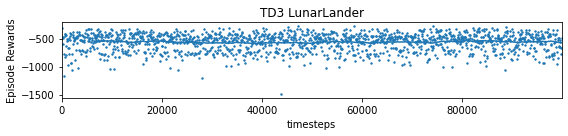

**Atari game such as pong (A2C with 6 envt) or breakout**

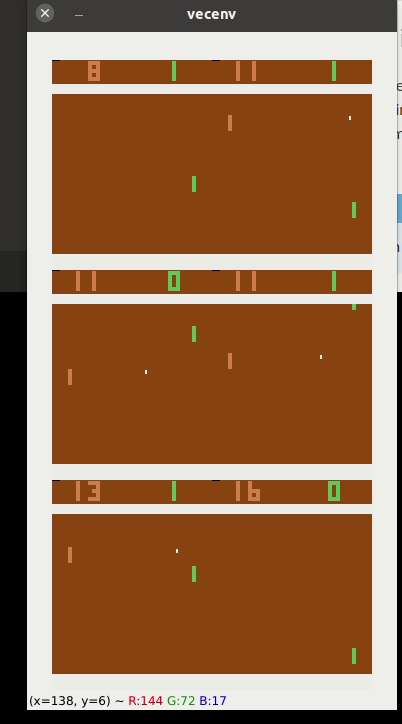

Here the list of valid gym atari environments: https://gym.openai.com/envs/#atari

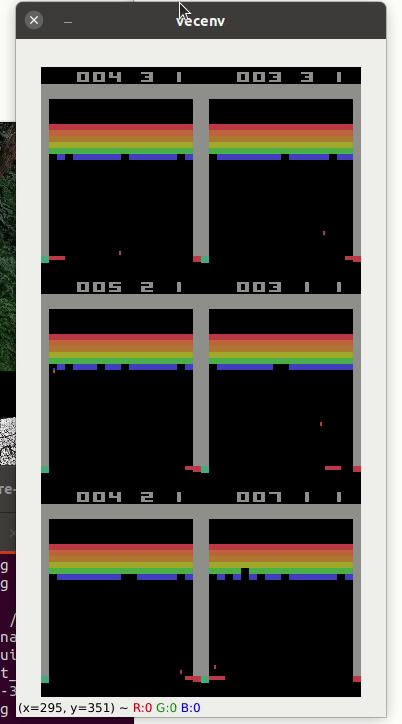